In [439]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

raw_df = pd.read_csv('Crime_Data_from_2010_to_Present.csv')

In [440]:
raw_df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [441]:
crime_data2_df = raw_df[['Time Occurred', 'Date Reported', 'Crime Code Description','Crime Code',
                        'Area ID','Location ', 'Weapon Description']].dropna()
crime_data2_df['Lat'] = crime_data2_df['Location '].map(lambda x:float(x.split(',')[0][1:]))
crime_data2_df['Lng'] = crime_data2_df['Location '].map(lambda x:float(x.split(',')[1][:-1]))
crime_data2_df = crime_data2_df[(crime_data2_df.Lat != 0) &
                              (crime_data2_df.Lng != 0)]
crime_data2_df.drop(columns=['Location '], inplace=True)
# sum(df1['Location '].isna())
crime_data2_df.head()

,Time Occurred,Date Reported,Crime Code Description,Crime Code,Area ID,Weapon Description,Lat,Lng
0,1800,03/14/2013,INTIMATE PARTNER - SIMPLE ASSAULT,626,12,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",33.9829,-118.3338
5,1400,01/08/2013,CRIMINAL HOMICIDE,110,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0591,-118.2412
16,1420,01/02/2013,BATTERY - SIMPLE ASSAULT,624,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0431,-118.2536
17,1430,01/02/2013,INTIMATE PARTNER - SIMPLE ASSAULT,626,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0503,-118.2504
18,1500,01/02/2013,BATTERY - SIMPLE ASSAULT,624,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0352,-118.2583


In [442]:
crime_data2_df['Date Reported'] = pd.to_datetime(crime_data2_df['Date Reported'])

In [547]:
crime_data_df = crime_data2_df.copy()
crime_data_df['Weekday'] = crime_data_df['Date Reported'].apply(lambda x:x.weekday())
crime_data_df['Week'] = crime_data_df['Date Reported'].dt.day
crime_data_df['Week'] = pd.cut(crime_data_df['Week'],bins=4, labels=range(1,5), include_lowest=True) 
crime_data_df['Year'] = crime_data_df['Date Reported'].dt.year
crime_data_df['Month'] = crime_data_df['Date Reported'].dt.month
crime_data_df['Time_bucket'] = pd.cut(crime_data_df['Time Occurred'],bins=6, labels=[200,600,1000,1400,1800,2200], include_lowest=True) 
crime_data_df.head()

,Time Occurred,Date Reported,Crime Code Description,Crime Code,Area ID,Weapon Description,Lat,Lng,Weekday,Week,Year,Month,Time_bucket
0,1800,2013-03-14,INTIMATE PARTNER - SIMPLE ASSAULT,626,12,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",33.9829,-118.3338,3,2,2013,3,1800
5,1400,2013-01-08,CRIMINAL HOMICIDE,110,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0591,-118.2412,1,1,2013,1,1400
16,1420,2013-01-02,BATTERY - SIMPLE ASSAULT,624,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0431,-118.2536,2,1,2013,1,1400
17,1430,2013-01-02,INTIMATE PARTNER - SIMPLE ASSAULT,626,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0503,-118.2504,2,1,2013,1,1400
18,1500,2013-01-02,BATTERY - SIMPLE ASSAULT,624,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0352,-118.2583,2,1,2013,1,1400


In [553]:
crime_data_df['Crime Code Description'].value_counts()

Assault                   382588
Robbery                    83715
NULL                       71908
Burglary                   32120
sex crimes                 13963
False pretenses            12814
Firearm                     5707
Kidnapping                  2536
Homicide                    2476
Arson                        400
Forgery                       65
Alcohol-related crimes        47
Name: Crime Code Description, dtype: int64

In [554]:
crime_data_df['Crime Code Description'] = crime_data_df['Crime Code Description'].replace(
    {'ABORTION/ILLEGAL':'NULL',
     'ARSON':'Arson',
     'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Assault',
     'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault',
     'ATTEMPTED ROBBERY': 'Robbery',
     'BATTERY - SIMPLE ASSAULT': 'Assault',
     'BATTERY ON A FIREFIGHTER': 'Assault',
     'BATTERY POLICE (SIMPLE)': 'Assault',
     'BATTERY WITH SEXUAL CONTACT': 'Assault',
     'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'Assault',
     'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065': 'Assault',
     'BIGAMY': 'False pretenses',
     'BIKE - ATTEMPTED STOLEN': 'Burglary',
     'BIKE - STOLEN': 'Burglary',
     'BLOCKING DOOR INDUCTION CENTER': 'NULL',
     'BOAT - STOLEN': 'Burglary',
     'BOMB SCARE': 'False pretenses',
     'BRANDISH WEAPON': 'False pretenses',
     'BRIBERY': 'False pretenses',
     'BUNCO, ATTEMPT': 'False pretenses',
     'BUNCO, GRAND THEFT': 'Robbery',
     'BUNCO, PETTY THEFT': 'Robbery',
     'BURGLARY': 'Burglary',
     'BURGLARY FROM VEHICLE': 'Burglary',
     'BURGLARY FROM VEHICLE, ATTEMPTED': 'Burglary',
     'BURGLARY, ATTEMPTED': 'Burglary',
     'CHILD ABANDONMENT': 'NULL',
     'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Assault',
     'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Assault',
     'CHILD ANNOYING (17YRS & UNDER)': 'Assault',
     'CHILD NEGLECT (SEE 300 W.I.C.)': 'NULL',
     'CHILD PORNOGRAPHY': 'NULL',
     'CHILD STEALING': 'Burglary',
     'CONSPIRACY': 'NULL',
     'CONTEMPT OF COURT': 'NULL',
     'CONTRIBUTING': 'NULL',
     'COUNTERFEIT': 'Forgery',
     'CREDIT CARDS, FRAUD USE ($950 & UNDER': 'Forgery',
     'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Forgery',
     'CRIMINAL HOMICIDE': 'Homicide',
     'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'NULL',
     'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Assault',
     'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060': 'Assault',
     'CRUELTY TO ANIMALS': 'Assault',
     'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER': 'Burglary',
     'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400': 'Burglary',
     'DISCHARGE FIREARMS/SHOTS FIRED': 'Firearm',
     'DISHONEST EMPLOYEE - GRAND THEFT': 'Burglary',
     'DISHONEST EMPLOYEE - PETTY THEFT': 'Burglary',
     'DISHONEST EMPLOYEE ATTEMPTED THEFT': 'Burglary',
     'DISRUPT SCHOOL': 'NULL',
     'DISTURBING THE PEACE': 'NULL',
     'DOCUMENT FORGERY / STOLEN FELONY': 'Forgery',
     'DOCUMENT WORTHLESS ($200 & UNDER)': 'Forgery',
     'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Forgery',
     'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'Burglary',
     'DRUGS, TO A MINOR': 'NULL',
     'DRUNK ROLL': 'Alcohol-related crimes',
     'DRUNK ROLL - ATTEMPT': 'Alcohol-related crimes',
     'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)':'False pretenses',
     'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':'False pretenses',
     'EXTORTION': 'Robbery',
     'FAILURE TO DISPERSE': 'NULL',
     'FAILURE TO YIELD': 'NULL',
     'FALSE IMPRISONMENT': 'NULL',
     'FALSE POLICE REPORT': 'NULL',
     'FIREARMS RESTRAINING ORDER (FIREARMS RO)':'Firearm',
     'GRAND THEFT / AUTO REPAIR': 'Burglary',
     'GRAND THEFT / INSURANCE FRAUD': 'Burglary',
     'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS':'Kidnapping',
     'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':'Kidnapping',
     'ILLEGAL DUMPING': 'NULL',
     'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'NULL',
     'INCITING A RIOT':'False pretenses',
     'INDECENT EXPOSURE': 'NULL',
     'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Assault',
     'INTIMATE PARTNER - SIMPLE ASSAULT': 'Assault',
     'KIDNAPPING': 'Kidnapping',
     'KIDNAPPING - GRAND ATTEMPT': 'Kidnapping',
     'LETTERS, LEWD': 'NULL',
     'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'NULL',
     'LEWD CONDUCT': 'NULL',
     'LEWD/LASCIVIOUS ACTS WITH CHILD': 'NULL',
     'LYNCHING': 'Homicide',
     'LYNCHING - ATTEMPTED': 'Homicide',
     'MANSLAUGHTER, NEGLIGENT': 'Homicide',
     'ORAL COPULATION': 'NULL',
     'OTHER ASSAULT': 'Assault',
     'OTHER MISCELLANEOUS CRIME': 'NULL',
     'PANDERING': 'sex crimes',
     'PEEPING TOM': 'sex crimes',
     'PETTY THEFT - AUTO REPAIR':'Burglary',
     'PICKPOCKET': 'Burglary',
     'PICKPOCKET, ATTEMPT': 'Burglary',
     'PIMPING': 'sex crimes',
     'PROWLER': 'NULL',
     'PURSE SNATCHING': 'Burglary',
     'PURSE SNATCHING - ATTEMPT': 'Burglary',
     'RAPE, ATTEMPTED': 'sex crimes',
     'RAPE, FORCIBLE': 'sex crimes',
     'RECKLESS DRIVING': 'Alcohol-related crimes',
     'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'Firearm',
     'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132': 'Firearm',
     'RESISTING ARREST': 'NULL',
     'ROBBERY':'Robbery',
     'SEX, UNLAWFUL': 'sex crimes',
     'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ': 'sex crimes',
     'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059': 'sex crimes',
     'SEXUAL PENETRATION W/FOREIGN OBJECT': 'sex crimes',
     'SEXUAL PENTRATION WITH A FOREIGN OBJECT': 'sex crimes',
     'SHOPLIFTING - ATTEMPT': 'Burglary',
     'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Burglary',
     'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Burglary',
     'SHOTS FIRED AT INHABITED DWELLING':'Firearm',
     'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT':'Firearm',
     'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'sex crimes',
     'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02': 'sex crimes',
     'STALKING': 'NULL',
     'TELEPHONE PROPERTY - DAMAGE': 'NULL',
     'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Burglary',
     'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)': 'Burglary',
     'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Burglary',
     'THEFT FROM PERSON - ATTEMPT': 'Burglary',
     'THEFT OF IDENTITY':'False pretenses',
     'THEFT PLAIN - ATTEMPT': 'Burglary',
     'THEFT PLAIN - PETTY ($950 & UNDER)': 'Burglary',
     'THEFT, COIN MACHINE - ATTEMPT': 'Burglary',
     'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Burglary',
     'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Burglary',
     'THEFT, PERSON': 'Burglary',
     'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Burglary',
     'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036': 'Burglary',
     'THREATENING PHONE CALLS/LETTERS': 'NULL',
     'THROWING OBJECT AT MOVING VEHICLE': 'NULL',
     'TILL TAP - ATTEMPT': 'Burglary',
     'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'Burglary',
     'TILL TAP - PETTY ($950 & UNDER)': 'Burglary',
     'TRAIN WRECKING': 'NULL',
     'TRESPASSING': 'NULL',
     'UNAUTHORIZED COMPUTER ACCESS':'False pretenses',
     'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'NULL',
     'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114': 'NULL',
     'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'NULL',
     'VEHICLE - ATTEMPT STOLEN': 'Burglary',
     'VEHICLE - STOLEN': 'Burglary',
     'VIOLATION OF COURT ORDER': 'NULL',
     'VIOLATION OF RESTRAINING ORDER': 'NULL',
     'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'NULL',
     'WEAPONS POSSESSION/BOMBING':'Firearm'})

In [555]:
crime_data_df['Crime Code Description'].value_counts()

Assault                   382588
Robbery                    83715
NULL                       71908
Burglary                   32120
sex crimes                 13963
False pretenses            12814
Firearm                     5707
Kidnapping                  2536
Homicide                    2476
Arson                        400
Forgery                       65
Alcohol-related crimes        47
Name: Crime Code Description, dtype: int64

In [445]:
crime_data_df = crime_data_df[crime_data_df['Crime Code Description'] != 'NULL']
crime_data_df.head()

,Time Occurred,Date Reported,Crime Code Description,Crime Code,Area ID,Weapon Description,Lat,Lng,Weekday,Week,Year,Month,Time_bucket
0,1800,2013-03-14,Assault,626,12,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",33.9829,-118.3338,3,2,2013,3,1800
5,1400,2013-01-08,Homicide,110,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0591,-118.2412,1,1,2013,1,1400
16,1420,2013-01-02,Assault,624,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0431,-118.2536,2,1,2013,1,1400
17,1430,2013-01-02,Assault,626,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0503,-118.2504,2,1,2013,1,1400
18,1500,2013-01-02,Assault,624,1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0352,-118.2583,2,1,2013,1,1400


# Grouping Crimes

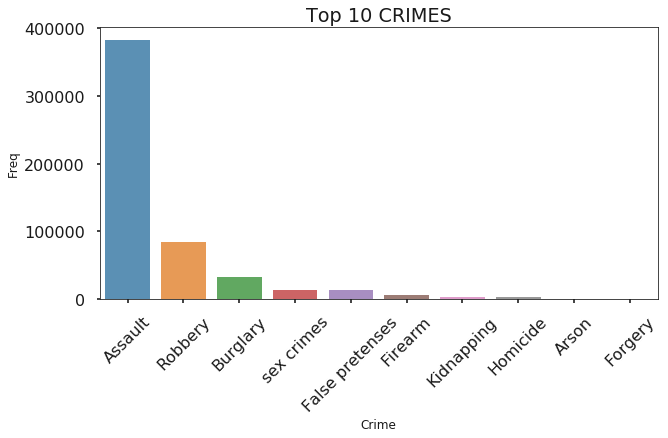

Assault                   382588
Robbery                    83715
Burglary                   32120
sex crimes                 13963
False pretenses            12814
Firearm                     5707
Kidnapping                  2536
Homicide                    2476
Arson                        400
Forgery                       65
Alcohol-related crimes        47
Name: Crime Code Description, dtype: int64

In [446]:
x = crime_data_df['Crime Code Description'].value_counts()[:10]

plt.figure(figsize=(10,5))
g = sns.barplot(x.index, x.values, alpha=.8)
plt.title('Top 10 CRIMES')
plt.ylabel('Freq', fontsize=12)
plt.xlabel('Crime', fontsize=12)
g.set_xticklabels(x.index, rotation=45)
plt.show()
crime_data_df['Crime Code Description'].value_counts()

In [606]:
CRIMES = ['Alcohol-related crimes',
'Arson',
'Assault',
'Burglary',
'False pretenses',
'Firearm',
'Forgery',
'Homicide',
'Kidnapping',
'Robbery',
'sex crimes']

TOURIST_CRIMES = [
'Assault',
'Burglary',
'Firearm',
'Homicide',
'Kidnapping',
'Robbery',
'sex crimes']

In [607]:
crime_data_df0 = crime_data_df[crime_data_df['Crime Code Description'] == 'Alcohol-related crimes']
crime_data_df1 = crime_data_df[crime_data_df['Crime Code Description'] == 'Arson']
crime_data_df2 = crime_data_df[crime_data_df['Crime Code Description'] == 'Assault']
crime_data_df3 = crime_data_df[crime_data_df['Crime Code Description'] == 'Burglary']
crime_data_df4 = crime_data_df[crime_data_df['Crime Code Description'] == 'False pretenses']
crime_data_df5 = crime_data_df[crime_data_df['Crime Code Description'] == 'Firearm']
crime_data_df6 = crime_data_df[crime_data_df['Crime Code Description'] == 'Forgery']
crime_data_df7 = crime_data_df[crime_data_df['Crime Code Description'] == 'Homicide']
crime_data_df8 = crime_data_df[crime_data_df['Crime Code Description'] == 'Kidnapping']
crime_data_df9 = crime_data_df[crime_data_df['Crime Code Description'] == 'Robbery']
crime_data_df10 = crime_data_df[crime_data_df['Crime Code Description'] == 'sex crimes']

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


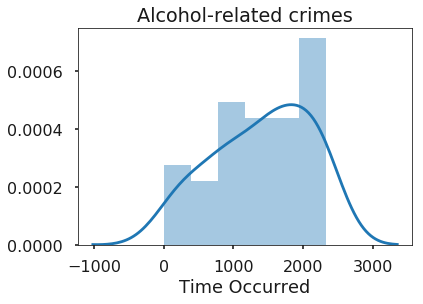

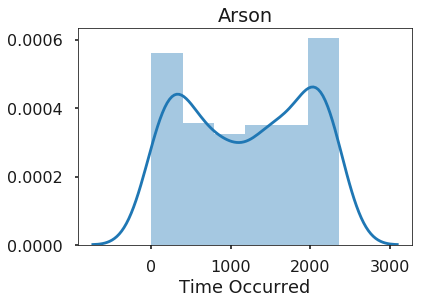

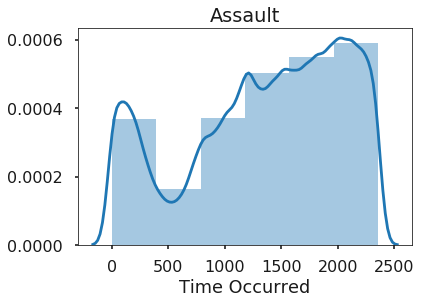

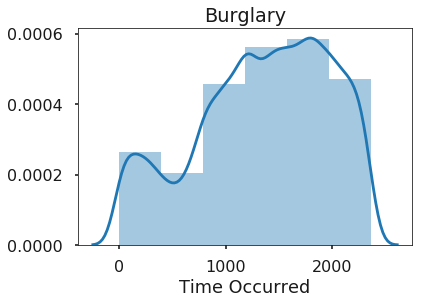

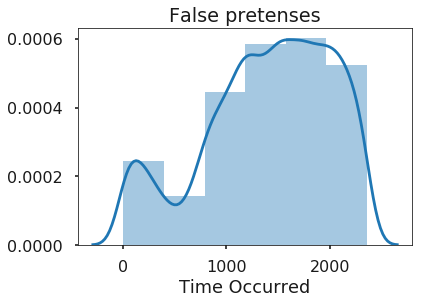

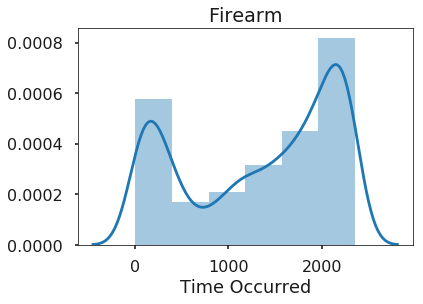

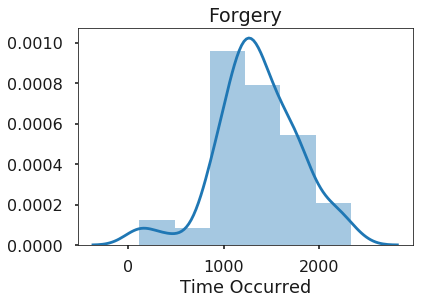

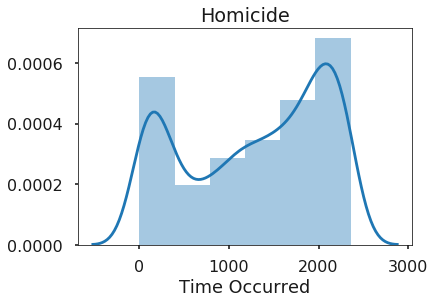

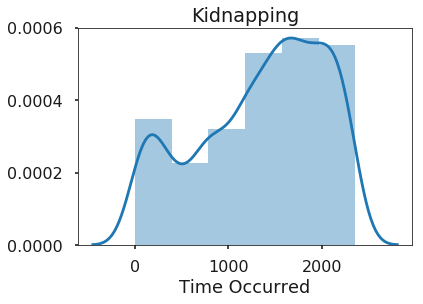

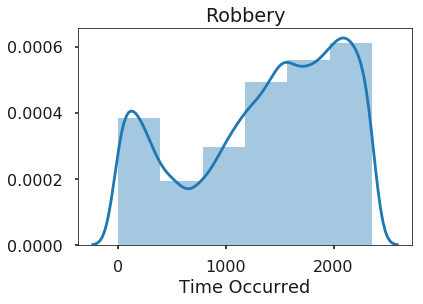

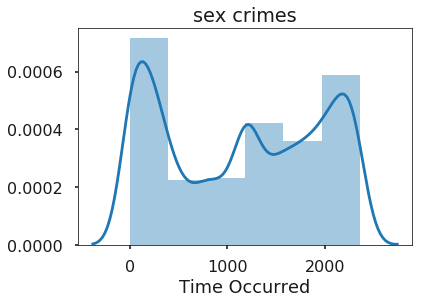

In [608]:
sns.distplot(crime_data_df0['Time Occurred'], bins=6)
plt.title(CRIMES[0])
plt.show()
sns.distplot(crime_data_df1['Time Occurred'], bins=6)
plt.title(CRIMES[1])
plt.show()
sns.distplot(crime_data_df2['Time Occurred'], bins=6)
plt.title(CRIMES[2])
plt.show()
sns.distplot(crime_data_df3['Time Occurred'], bins=6)
plt.title(CRIMES[3])
plt.show()
sns.distplot(crime_data_df4['Time Occurred'], bins=6)
plt.title(CRIMES[4])
plt.show()
sns.distplot(crime_data_df5['Time Occurred'], bins=6)
plt.title(CRIMES[5])
plt.show()
sns.distplot(crime_data_df6['Time Occurred'], bins=6)
plt.title(CRIMES[6])
plt.show()
sns.distplot(crime_data_df7['Time Occurred'], bins=6)
plt.title(CRIMES[7])
plt.show()
sns.distplot(crime_data_df8['Time Occurred'], bins=6)
plt.title(CRIMES[8])
plt.show()
sns.distplot(crime_data_df9['Time Occurred'], bins=6)
plt.title(CRIMES[9])
plt.show()
sns.distplot(crime_data_df10['Time Occurred'], bins=6)
plt.title(CRIMES[10])
plt.show()

Firearm


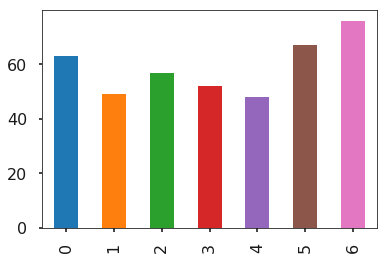

In [616]:
print(CRIMES[5])
data = crime_data_df5[crime_data_df5['Date Reported'] >= '2018-01-29']
data['Weekday'].value_counts().sort_index().plot(kind='bar')

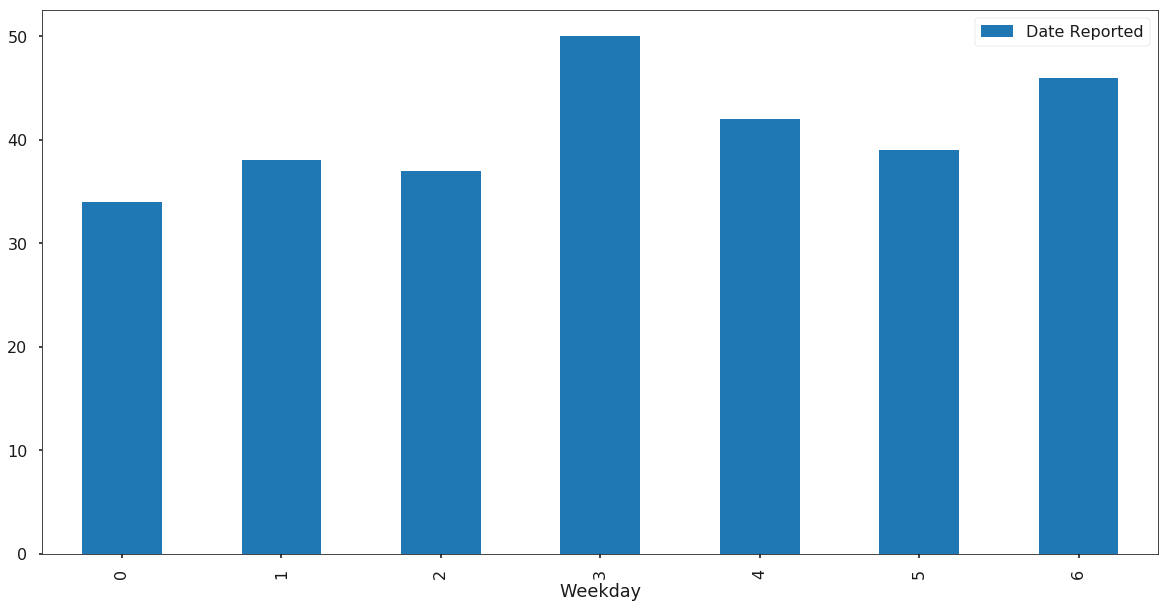

In [560]:
plt.figure(figsize=(15,8))
data = crime_data_df1[crime_data_df1['Date Reported'] >= '2013-01-29']
y = data[['Date Reported']].groupby([data['Weekday']]).count().plot(kind='bar', figsize=(20,10))

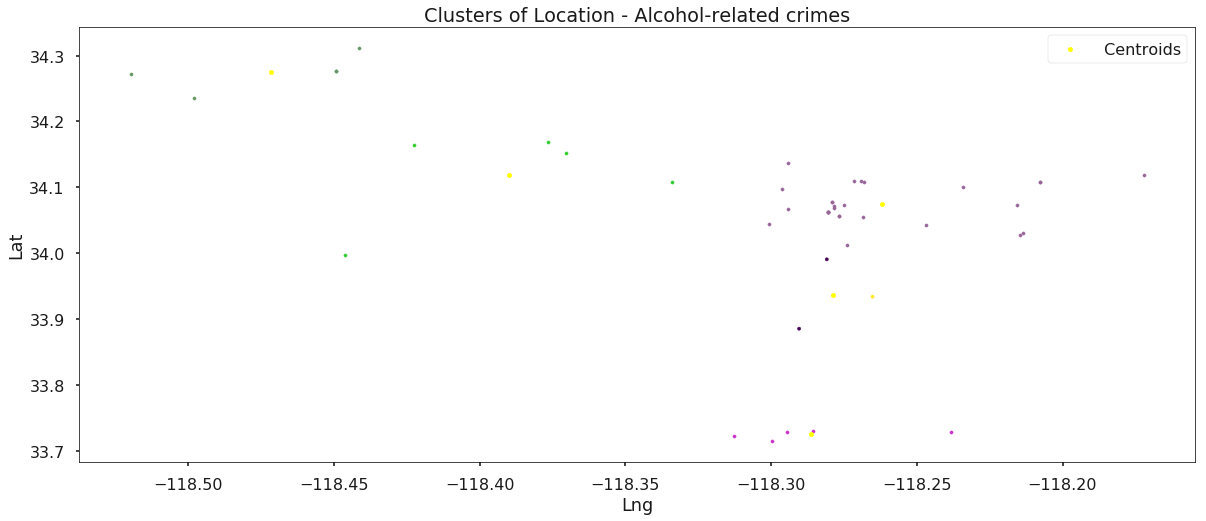

In [561]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df0
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 5
kmeans0 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means0 = kmeans0.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means0==i, 0],  X[y_means0==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans0.cluster_centers_[:,0],  kmeans0.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[0]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

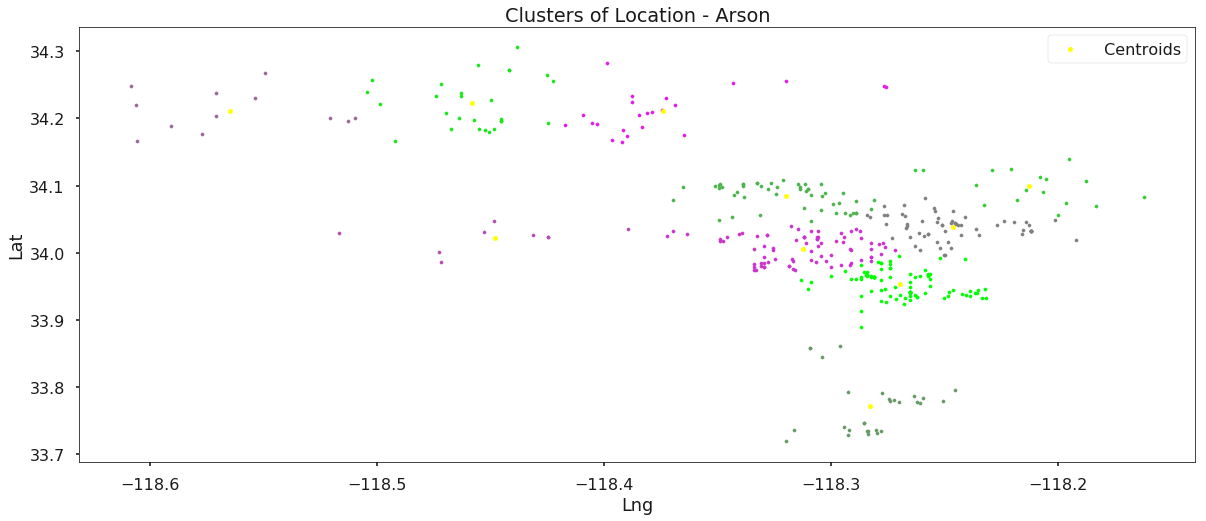

In [562]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df1
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 10
kmeans1 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means1 = kmeans1.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means1==i, 0],  X[y_means1==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans1.cluster_centers_[:,0],  kmeans1.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[1]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

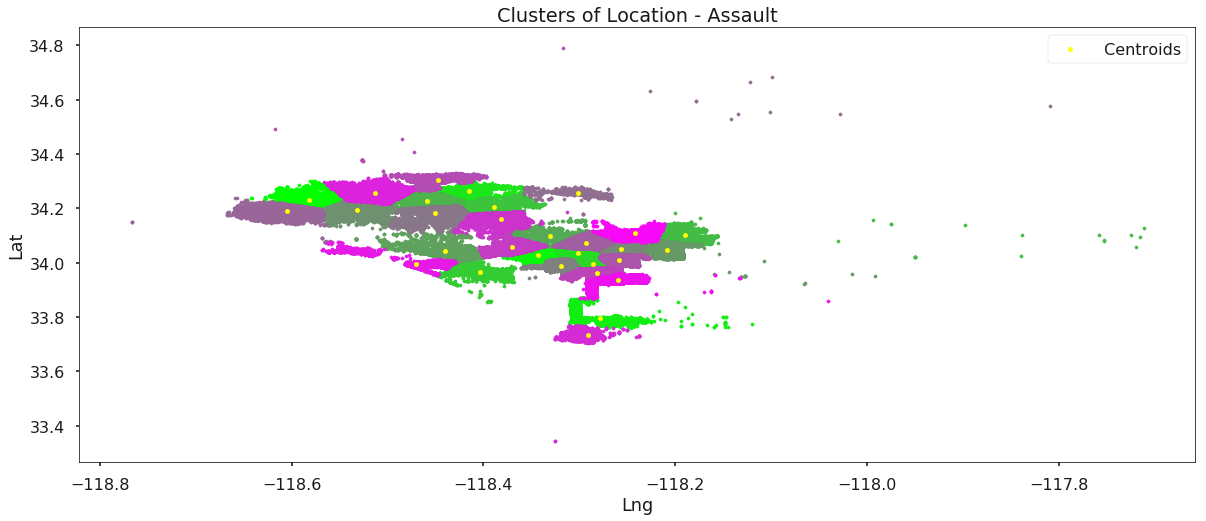

In [563]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df2
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 30
kmeans2 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means2 = kmeans2.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means2==i, 0],  X[y_means2==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans2.cluster_centers_[:,0],  kmeans2.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[2]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

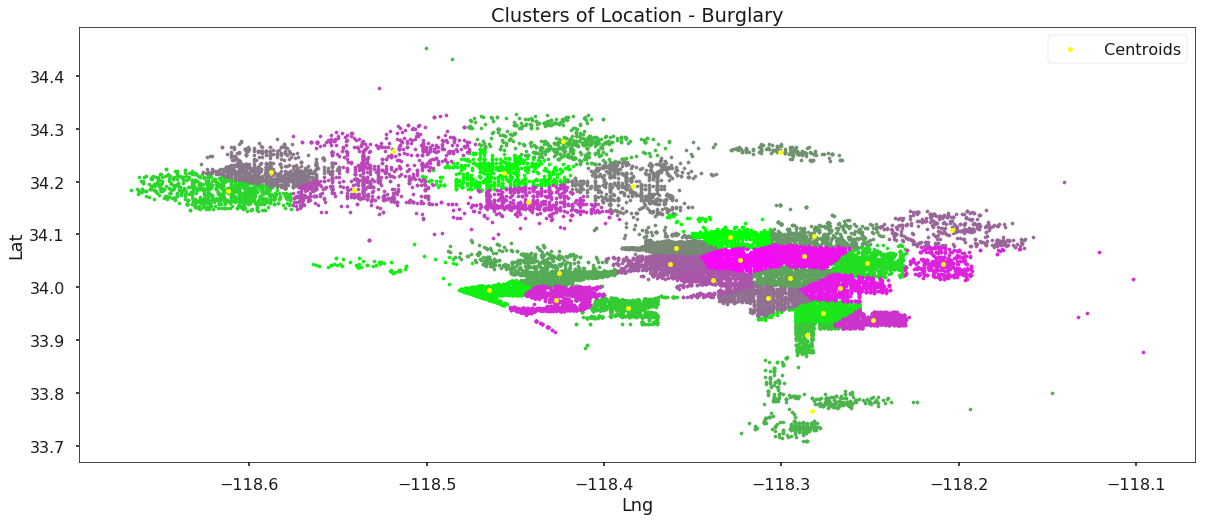

In [564]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df3
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 30
kmeans3 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means3 = kmeans3.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means3==i, 0],  X[y_means3==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans3.cluster_centers_[:,0],  kmeans3.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[3]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

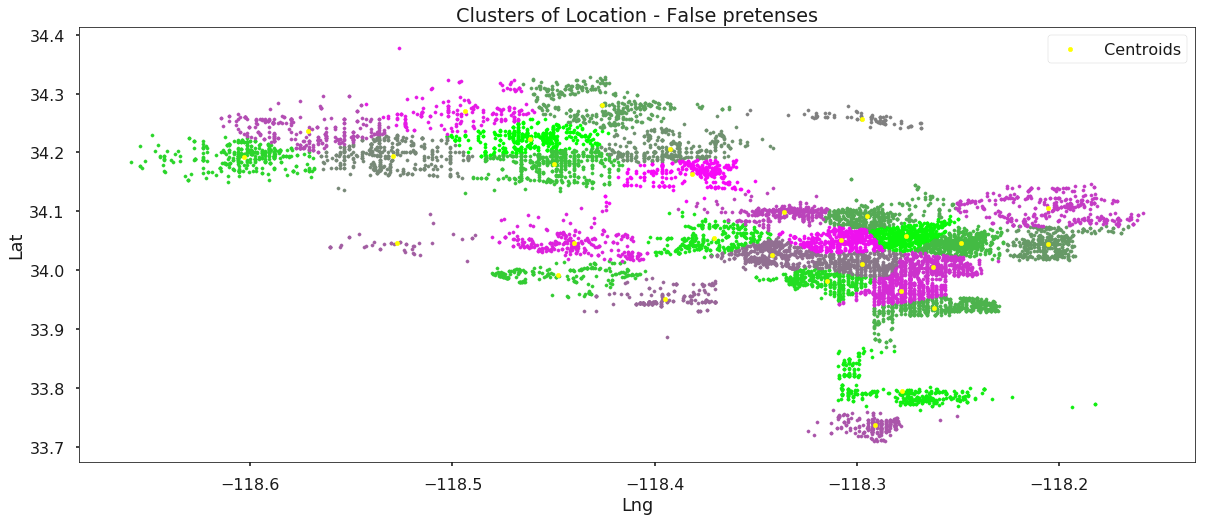

In [565]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df4
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 30
kmeans4 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means4 = kmeans4.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means4==i, 0],  X[y_means4==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans4.cluster_centers_[:,0],  kmeans4.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[4]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

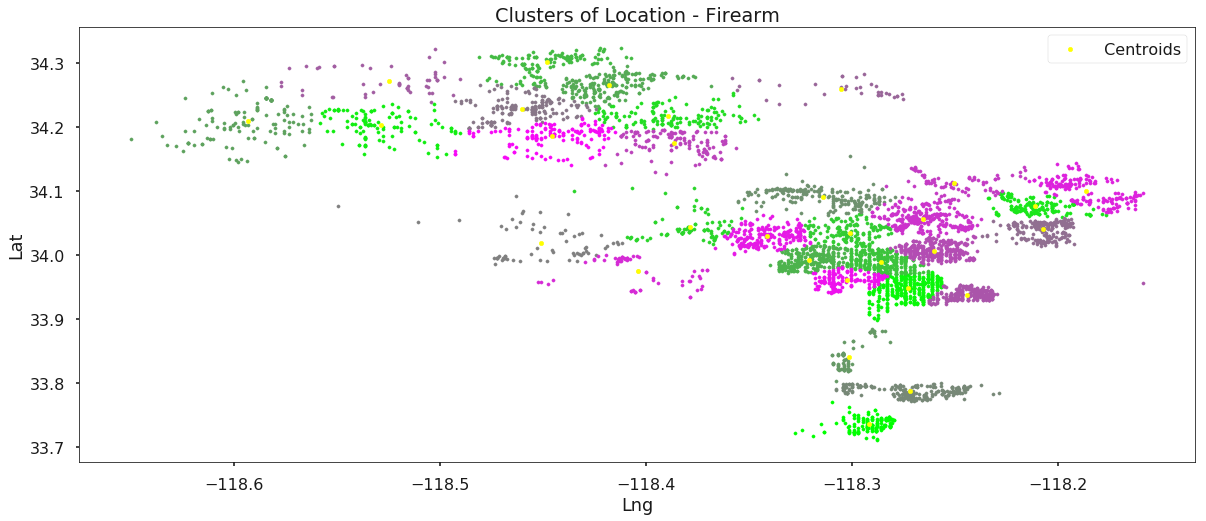

In [566]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df5
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 30
kmeans5 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means5 = kmeans5.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means5==i, 0],  X[y_means5==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans5.cluster_centers_[:,0],  kmeans5.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[5]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

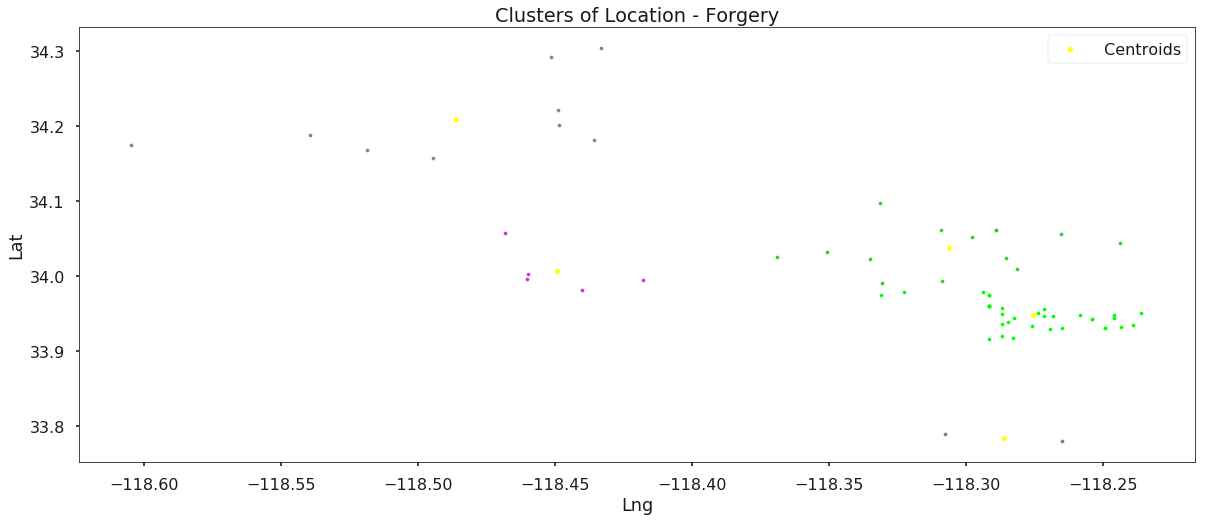

In [567]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df6
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 5
kmeans6 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means6 = kmeans6.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means6==i, 0],  X[y_means6==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans6.cluster_centers_[:,0],  kmeans6.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[6]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

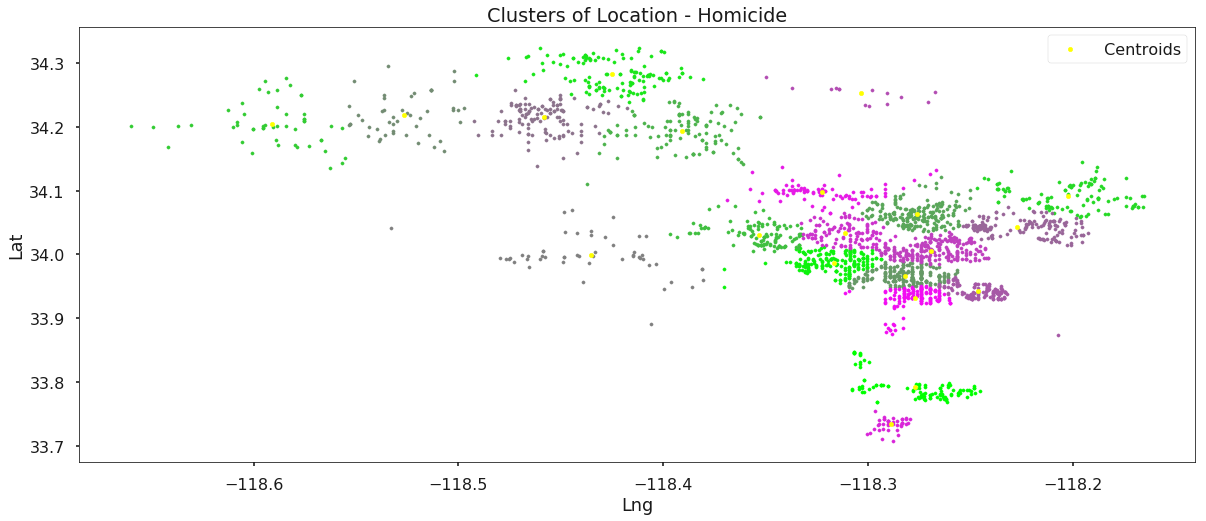

In [568]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df7
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 20
kmeans7 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means7 = kmeans7.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means7==i, 0],  X[y_means7==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans7.cluster_centers_[:,0],  kmeans7.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[7]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

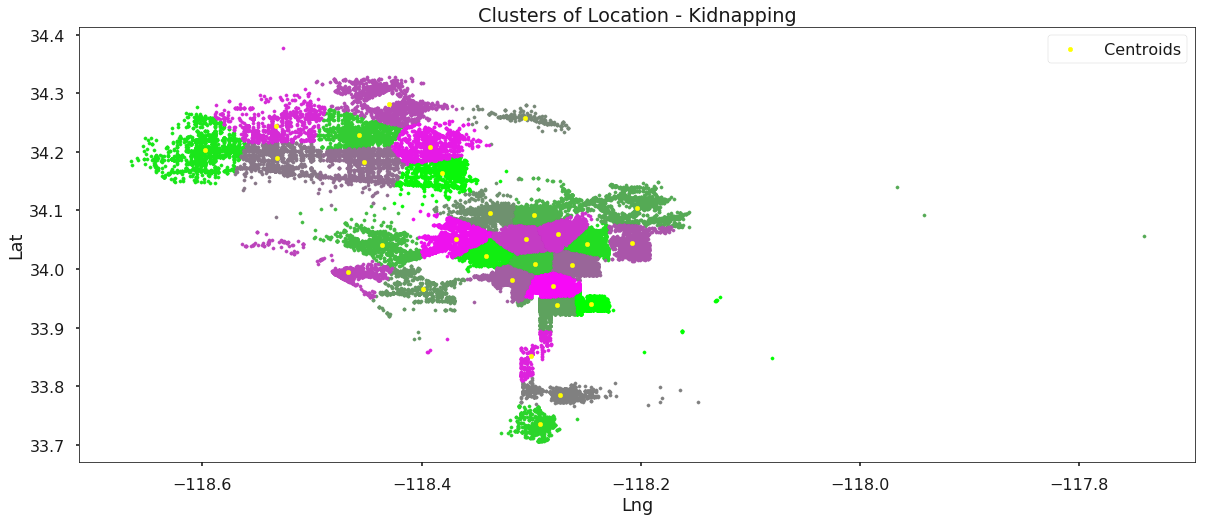

In [569]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df8
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 30
kmeans8 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means8 = kmeans8.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means8==i, 0],  X[y_means8==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans8.cluster_centers_[:,0],  kmeans8.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[8]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

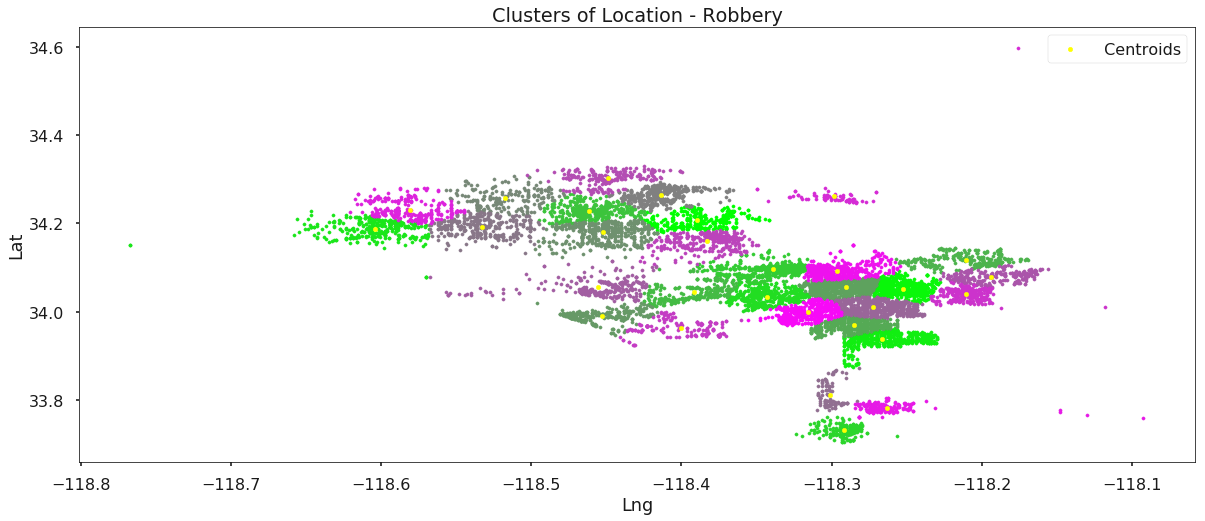

In [570]:
from sklearn.cluster import KMeans
#Importing the dataset with pandas
dataset = crime_data_df9
X = dataset.iloc[: ,[7,6]].values

#Applying k-means to the dataset
N = 30
kmeans9 = KMeans(n_clusters = N, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means9 = kmeans9.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(20,8))
for i in range(N):
    plt.scatter(X[y_means9==i, 0],  X[y_means9==i, 1], s=10, c=(i/float(N), (float(N) - i)/float(N), i/float(N)), label='')

plt.scatter(kmeans9.cluster_centers_[:,0],  kmeans9.cluster_centers_[:,1], s = 20, c='yellow', label=' Centroids')
plt.title('Clusters of Location - {}'.format(CRIMES[9]))
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.legend()
plt.show()

In [571]:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [572]:
x = crime_data_df0.Week.value_counts()

def listify(series, rng):
    L = []
    index = series.index
    for i in rng:
        if i in index:
            L.append(series[i])
        else:
            L.append(0)
    return L
listify(x,[1,2,3,4, 5])

[13, 8, 19, 7, 0]

In [573]:
crime_data_df0.head()

,Time Occurred,Date Reported,Crime Code Description,Crime Code,Area ID,Weapon Description,Lat,Lng,Weekday,Week,Year,Month,Time_bucket
2073,1615,2010-09-22,Alcohol-related crimes,438,11,VEHICLE,34.0982,-118.2961,2,3,2010,9,1800
92861,1940,2010-06-02,Alcohol-related crimes,438,11,VEHICLE,34.1092,-118.2714,2,1,2010,6,1800
102056,800,2013-02-01,Alcohol-related crimes,438,11,VEHICLE,34.1083,-118.2680,4,1,2013,2,1000
214601,2300,2010-01-18,Alcohol-related crimes,438,2,VEHICLE,34.0721,-118.2785,0,3,2010,1,2200
214837,1130,2010-01-29,Alcohol-related crimes,438,2,VEHICLE,34.0689,-118.2783,4,4,2010,1,1000


In [574]:
import math
def get_centroids(crime_data_df0, y_means0, kmeans0):
    centroids0 = []
    for i in range(N):
        centroid = {}
        data = crime_data_df0[y_means0==i]
        if data.shape[0] < 5:
            continue
        centroid['Crime'] = data['Crime Code Description'].iloc[0]
        centroid['Lng'] = kmeans0.cluster_centers_[i,0]
        centroid['Lat'] = kmeans0.cluster_centers_[i,1]
        data['distance'] =  data.apply(lambda row: distance((row['Lat'],row['Lng']), (centroid['Lat'], centroid['Lng'])), axis=1)
        centroid['Radius'] = data['distance'].quantile(.5)
        centroid['AreaID'] = data[data.distance == data['distance'].min()].iloc[0]['Area ID']
        area = math.pi * (centroid['Radius']) ** 2
        centroid['Density'] = data.shape[0] / area / 6 #crime/m2/yr
        centroid['Month_D'] = listify(crime_data_df0.Month.value_counts(),[1,2,3,4,5,6,7,8,9,10,11,12])
        centroid['Month_Bool'] = list(pd.Series(centroid['Month_D']) > 1268)
        centroid['Week_D'] = listify(crime_data_df0.Week.value_counts(),[1,2,3,4])
        centroid['Week_Bool'] = list(pd.Series(centroid['Week_D']) > 3665)
        centroid['Weekday_D'] = listify(crime_data_df0.Weekday.value_counts(),[0,1,2,3,4,5,6])
        centroid['Weekday_Bool'] = list(pd.Series(centroid['Weekday_D']) > 2203)
        centroid['Time_D'] = listify(crime_data_df0.Time_bucket.value_counts(),[200,600,1000,1400,1800,2200])
        centroid['Time_Bool'] = list(pd.Series(centroid['Time_D']) > 3033)
        centroids0.append(centroid)
    return centroids0

# Limit Finding

In [575]:
vals = []
for k,centroids in DB.items():
    for centroid in centroids:
        vals.extend(centroid['Time_D'])
pd.Series(vals).quantile(.5)
# sns.distplot(vals)

3033.0

In [576]:
D=0.5

In [577]:
print(CRIMES[0])
centroids0 = get_centroids(crime_data_df0, y_means0, kmeans0)
filtered_centroids0 = list(filter(lambda d: d['Density']> D,centroids0))
filtered_centroids0

Alcohol-related crimes


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[]

In [578]:
print(CRIMES[1])
centroids1 = get_centroids(crime_data_df1, y_means1, kmeans1)
filtered_centroids1 = list(filter(lambda d: d['Density']> D,centroids1))


Arson


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [584]:
print(CRIMES[2])
centroids2 = get_centroids(crime_data_df2, y_means2, kmeans2)
filtered_centroids2 = list(filter(lambda d: d['Density']> D,centroids2))
filtered_centroids2, len(filtered_centroids2,)

Assault


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


([{'Crime': 'Assault',
   'Lng': -118.58191487678046,
   'Lat': 34.231503221795165,
   'Radius': 2.486728146841737,
   'AreaID': 17,
   'Density': 75.9165479613409,
   'Month_D': [30076,
    28598,
    33180,
    32696,
    35218,
    34432,
    35412,
    35249,
    33689,
    30389,
    26890,
    26759],
   'Month_Bool': [True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True],
   'Week_D': [99583, 99961, 88987, 94057],
   'Week_Bool': [True, True, True, True],
   'Weekday_D': [56930, 52576, 52681, 52933, 53040, 54676, 59752],
   'Weekday_Bool': [True, True, True, True, True, True, True],
   'Time_D': [55220, 24517, 55888, 75395, 82799, 88769],
   'Time_Bool': [True, True, True, True, True, True]},
  {'Crime': 'Assault',
   'Lng': -118.34339348377446,
   'Lat': 34.02737145086818,
   'Radius': 1.5999300132593437,
   'AreaID': 3,
   'Density': 319.0009384645873,
   'Month_D': [30076,
    28598,
    33180,
    32696,
    35218

In [596]:
print(CRIMES[3])
centroids3 = get_centroids(crime_data_df3, y_means3, kmeans3)
filtered_centroids3 = list(filter(lambda d: d['Density']> D,centroids3))
filtered_centroids3

Burglary


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[{'Crime': 'Burglary',
  'Lng': -118.32919534220532,
  'Lat': 34.094870247148286,
  'Radius': 1.3501324916836708,
  'AreaID': 6,
  'Density': 30.762461726254745,
  'Month_D': [2910,
   2451,
   2706,
   2760,
   2736,
   2766,
   2838,
   2871,
   2802,
   2545,
   2390,
   2345],
  'Month_Bool': [True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True],
  'Week_D': [8139, 8384, 7527, 8070],
  'Week_Bool': [True, True, True, True],
  'Weekday_D': [4830, 4925, 4757, 4819, 4699, 4052, 4038],
  'Weekday_Bool': [True, True, True, True, True, True, True],
  'Time_D': [3334, 2596, 5756, 7099, 7370, 5965],
  'Time_Bool': [True, False, True, True, True, True]},
 {'Crime': 'Burglary',
  'Lng': -118.45660079893476,
  'Lat': 34.21619374167776,
  'Radius': 2.373016365606833,
  'AreaID': 19,
  'Density': 7.075177620944608,
  'Month_D': [2910,
   2451,
   2706,
   2760,
   2736,
   2766,
   2838,
   2871,
   2802,
   2545,
   2390,
   2345],
  'Month_B

In [599]:
print(CRIMES[4])
centroids4 = get_centroids(crime_data_df4, y_means4, kmeans4)
filtered_centroids4 = list(filter(lambda d: d['Density']> D,centroids4))
filtered_centroids4

False pretenses


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[{'Crime': 'False pretenses',
  'Lng': -118.461765,
  'Lat': 34.2229064,
  'Radius': 1.749402437414147,
  'AreaID': 19,
  'Density': 8.667411714948711,
  'Month_D': [1011,
   917,
   1166,
   1085,
   1139,
   1205,
   1184,
   1255,
   1150,
   1026,
   861,
   815],
  'Month_Bool': [False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False],
  'Week_D': [3349, 3295, 2965, 3205],
  'Week_Bool': [False, False, False, False],
  'Weekday_D': [1925, 1878, 1817, 1890, 1867, 1687, 1750],
  'Weekday_Bool': [False, False, False, False, False, False, False],
  'Time_D': [1239, 723, 2240, 2939, 3033, 2640],
  'Time_Bool': [False, False, False, False, False, False]},
 {'Crime': 'False pretenses',
  'Lng': -118.27568793324775,
  'Lat': 34.05845712451861,
  'Radius': 1.2904793541700956,
  'AreaID': 2,
  'Density': 24.784282587939433,
  'Month_D': [1011,
   917,
   1166,
   1085,
   1139,
   1205,
   1184,
   1255,
   1150,
   1026,
   861,


In [587]:
print(CRIMES[5])
centroids5 = get_centroids(crime_data_df5, y_means5, kmeans5)
filtered_centroids5 = list(filter(lambda d: d['Density']> D,centroids5))
filtered_centroids5

Firearm


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[{'Crime': 'Firearm',
  'Lng': -118.29134638554217,
  'Lat': 33.73526686746988,
  'Radius': 1.0652496953173372,
  'AreaID': 5,
  'Density': 7.760757756980067,
  'Month_D': [536, 399, 534, 550, 510, 513, 493, 488, 463, 411, 384, 426],
  'Month_Bool': [False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False],
  'Week_D': [1543, 1460, 1309, 1395],
  'Week_Bool': [False, False, False, False],
  'Weekday_D': [838, 700, 731, 662, 744, 955, 1077],
  'Weekday_Bool': [False, False, False, False, False, False, False],
  'Time_D': [1294, 384, 472, 712, 1012, 1833],
  'Time_Bool': [False, False, False, False, False, False]},
 {'Crime': 'Firearm',
  'Lng': -118.27258270833333,
  'Lat': 33.94775104166666,
  'Radius': 1.5003937820600055,
  'AreaID': 18,
  'Density': 11.35887718336513,
  'Month_D': [536, 399, 534, 550, 510, 513, 493, 488, 463, 411, 384, 426],
  'Month_Bool': [False,
   False,
   False,
   False,
   False,
   False,
   False,


In [598]:
print(CRIMES[6])
centroids6 = get_centroids(crime_data_df6, y_means6, kmeans6)
filtered_centroids6 = list(filter(lambda d: d['Density']> D,centroids6))


Forgery


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [589]:
print(CRIMES[7])
centroids7 = get_centroids(crime_data_df7, y_means7, kmeans7)
filtered_centroids7 = list(filter(lambda d: d['Density']> D,centroids7))


Homicide


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [590]:
print(CRIMES[8])
centroids8 = get_centroids(crime_data_df8, y_means8, kmeans8)
filtered_centroids8 = list(filter(lambda d: d['Density']> D,centroids8))


Kidnapping


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [591]:
print(CRIMES[9])
centroids9 = get_centroids(crime_data_df9, y_means9, kmeans9)
filtered_centroids9 = list(filter(lambda d: d['Density']> D,centroids9))
filtered_centroids9

Robbery


c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[{'Crime': 'sex crimes',
  'Lng': -118.38963121827412,
  'Lat': 34.20707639593909,
  'Radius': 2.044637788812517,
  'AreaID': 15,
  'Density': 4.999911675491823,
  'Month_D': [1033,
   1107,
   1233,
   1268,
   1269,
   1212,
   1268,
   1313,
   1267,
   1087,
   986,
   920],
  'Month_Bool': [False,
   False,
   False,
   False,
   True,
   False,
   False,
   True,
   False,
   False,
   False,
   False],
  'Week_D': [3678, 3653, 3196, 3436],
  'Week_Bool': [True, False, False, False],
  'Weekday_D': [2223, 2203, 2190, 2069, 1906, 1600, 1772],
  'Weekday_Bool': [True, False, False, False, False, False, False],
  'Time_D': [3930, 1236, 1276, 2317, 1977, 3227],
  'Time_Bool': [True, False, False, False, False, True]},
 {'Crime': 'sex crimes',
  'Lng': -118.25259397379912,
  'Lat': 34.051033711790396,
  'Radius': 1.3052349395598342,
  'AreaID': 1,
  'Density': 35.65553702753977,
  'Month_D': [1033,
   1107,
   1233,
   1268,
   1269,
   1212,
   1268,
   1313,
   1267,
   1087,
   986

In [600]:
DB = {CRIMES[0]:filtered_centroids0,
 CRIMES[1]:filtered_centroids1,
 CRIMES[2]:filtered_centroids2,
 CRIMES[3]:filtered_centroids3,
 CRIMES[4]:filtered_centroids4,
 CRIMES[5]:filtered_centroids5,
 CRIMES[6]:filtered_centroids6,
 CRIMES[7]:filtered_centroids7,
 CRIMES[8]:filtered_centroids8,
 CRIMES[9]:filtered_centroids9,
}

with open('db.txt', 'w') as f:
    f.write(str(DB))

In [593]:
DB

{'Alcohol-related crimes': [],
 'Arson': [{'Crime': 'Arson',
   'Lng': -118.26955494505495,
   'Lat': 33.95388241758242,
   'Radius': 2.1856131128570024,
   'AreaID': 18,
   'Density': 1.0106335095159011,
   'Month_D': [39, 24, 31, 35, 33, 29, 38, 42, 38, 39, 24, 28],
   'Month_Bool': [False,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    False],
   'Week_D': [96, 118, 86, 100],
   'Week_Bool': [False, False, False, False],
   'Weekday_D': [46, 54, 53, 67, 62, 60, 58],
   'Weekday_Bool': [False, False, False, False, False, False, False],
   'Time_D': [88, 56, 51, 55, 55, 95],
   'Time_Bool': [False, False, False, False, False, False]}],
 'Assault': [{'Crime': 'Assault',
   'Lng': -118.58191487678046,
   'Lat': 34.231503221795165,
   'Radius': 2.486728146841737,
   'AreaID': 17,
   'Density': 75.9165479613409,
   'Month_D': [30076,
    28598,
    33180,
    32696,
    35218,
    34432,
    35412,
    35249,
    33689,
  

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


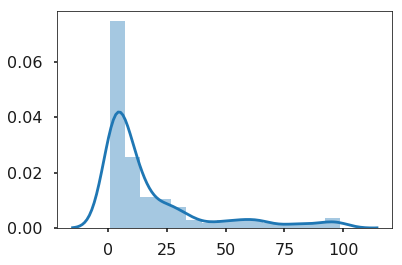

In [545]:
densities = []
for k,centroids in DB.items():
    for centroid in centroids:
        densities.append(centroid['Density'])
sns.distplot(list(filter(lambda x:x<100, densities)))

In [604]:
DB.values()
centroids = []
for lst in DB.values():
    centroids.extend(lst)

dict_values([[], [{'Crime': 'Arson', 'Lng': -118.26955494505495, 'Lat': 33.95388241758242, 'Radius': 2.1856131128570024, 'AreaID': 18, 'Density': 1.0106335095159011, 'Month_D': [39, 24, 31, 35, 33, 29, 38, 42, 38, 39, 24, 28], 'Month_Bool': [False, False, False, False, False, False, False, False, False, False, False, False], 'Week_D': [96, 118, 86, 100], 'Week_Bool': [False, False, False, False], 'Weekday_D': [46, 54, 53, 67, 62, 60, 58], 'Weekday_Bool': [False, False, False, False, False, False, False], 'Time_D': [88, 56, 51, 55, 55, 95], 'Time_Bool': [False, False, False, False, False, False]}], [{'Crime': 'Assault', 'Lng': -118.58191487678046, 'Lat': 34.231503221795165, 'Radius': 2.486728146841737, 'AreaID': 17, 'Density': 75.9165479613409, 'Month_D': [30076, 28598, 33180, 32696, 35218, 34432, 35412, 35249, 33689, 30389, 26890, 26759], 'Month_Bool': [True, True, True, True, True, True, True, True, True, True, True, True], 'Week_D': [99583, 99961, 88987, 94057], 'Week_Bool': [True, T

In [605]:
TOURIST_CRIMES = [
'Assault',
'Burglary',
'Firearm',
'Homicide',
'Kidnapping',
'Robbery',
'sex crimes']

def police_request(crime_type, month, week, day, AreaID, time, *threshold):
    '''
    crime_type - string, 
    month - int (zero based index),
    day - string (zero based index), 
    AreaID - list of int (zero based indexes),
    time - int (zero based index)
    '''
    AreaID = list(map(lambda x: x+1, AreaID))
    day = int(day)
    centroids = DB[crime_type]
    print(len(centroids))
    centroids = list(filter(lambda d: d['AreaID'] in AreaID, centroids))
    print(len(centroids))
    centroids = list(filter(lambda d: d['Month_Bool'][month] == True, centroids))
    print(len(centroids))
    centroids = list(filter(lambda d: d['Week_Bool'][week] == True, centroids))
    print(len(centroids))
    centroids = list(filter(lambda d: d['Weekday_Bool'][day] == True, centroids))
    print(len(centroids))
    centroids = list(filter(lambda d: d['Time_Bool'][time] == True, centroids))
    print(len(centroids))
    return centroids

def user_request(time):
    '''
    time - int (zero based index)
    '''
    DBfilt = dict((key,value) for key, value in DB.items() if key in TOURIST_CRIMES)
    centroids = []
    for lst in DBfilt.values():
        centroids.extend(lst)
    centroids = list(filter(lambda d: d['Time_Bool'][time] == True, centroids))
    return centroids

police_request(CRIMES[2], 0, 0, '1', range(1,20), 0)
user_request(0)

30
28
28
28
28
28


[{'Crime': 'Assault',
  'Lng': -118.58191487678046,
  'Lat': 34.231503221795165,
  'Radius': 2.486728146841737,
  'AreaID': 17,
  'Density': 75.9165479613409,
  'Month_D': [30076,
   28598,
   33180,
   32696,
   35218,
   34432,
   35412,
   35249,
   33689,
   30389,
   26890,
   26759],
  'Month_Bool': [True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True,
   True],
  'Week_D': [99583, 99961, 88987, 94057],
  'Week_Bool': [True, True, True, True],
  'Weekday_D': [56930, 52576, 52681, 52933, 53040, 54676, 59752],
  'Weekday_Bool': [True, True, True, True, True, True, True],
  'Time_D': [55220, 24517, 55888, 75395, 82799, 88769],
  'Time_Bool': [True, True, True, True, True, True]},
 {'Crime': 'Assault',
  'Lng': -118.34339348377446,
  'Lat': 34.02737145086818,
  'Radius': 1.5999300132593437,
  'AreaID': 3,
  'Density': 319.0009384645873,
  'Month_D': [30076,
   28598,
   33180,
   32696,
   35218,
   34432,
   35412,
   35249,
   33689,
   30

In [498]:
CRIMES[2]

'Assault'

In [481]:
raw_df.columns
raw_df['Victim Descent'].value_counts()

H    632362
W    448419
B    292986
O    177203
X     56229
A     43582
K      8077
F      2133
I       765
C       704
P       308
J       277
U       166
V       105
G        75
Z        70
S        29
D        18
L        11
-         2
Name: Victim Descent, dtype: int64

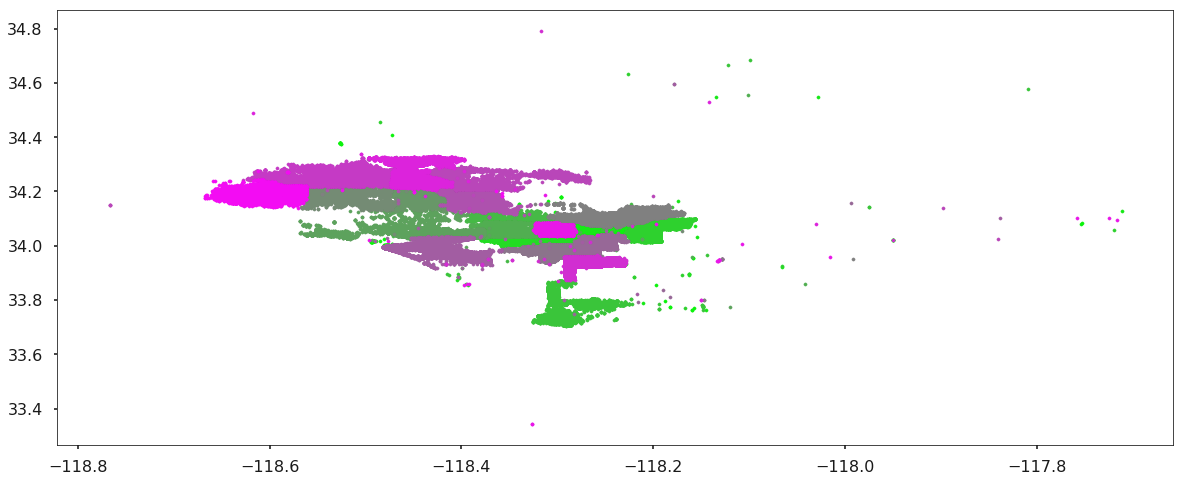

In [482]:
plt.figure(figsize=(20,8))
for i in range(1,22):
    data = crime_data_assault_df[crime_data_assault_df['Area ID'] == i]
    plt.scatter(data.Lng,  data.Lat, s=10, c=(i/22, (22 - i)/22, i/22), label=str(i))


In [483]:
data = crime_data_df[crime_data_df['Date Reported'] >= '2018-06-01']

crime_data_df.apply(lambda row: [row['Lat'], row['Lng']], axis = 1)
# crime_data_df.head()

crimes = list(data['Crime Code Description'].value_counts().index)[:25]
for crime in crimes:
    X = data[data['Crime Code Description'] == crime]
#     Visualising the clusters
    plt.figure(figsize=(15,8))
    plt.scatter(X.Lng,  X.Lat, s=10, c='red', label='asasas')
    plt.title('Cluster: {}'. format(crime))
    plt.xlabel('Lng')
    plt.ylabel('Lat')
    plt.legend()
    plt.show()

ValueError: Shape of passed values is (536431, 2), indices imply (536431, 13)

In [ ]:
crime_data_df[crime_data_df['Date Reported'] >= '1']

# Interpreting Time

In [ ]:
crime_data2_df = raw_df[['Time Occurred','Date Reported', 'Crime Code Description', 'Location ']].dropna()
crime_data2_df['Lat'] = crime_data2_df['Location '].map(lambda x:float(x.split(',')[0][1:]))
crime_data2_df['Lng'] = crime_data2_df['Location '].map(lambda x:float(x.split(',')[1][:-1]))
crime_data2_df = crime_data2_df[(crime_data2_df.Lat != 0) &
                              (crime_data2_df.Lng != 0)]
# crime_data2_df = pd.to_datetime(crime_data2_df['Date Reported'])

In [ ]:
crime_data2_df.head()

In [ ]:
print(raw_df['Crime Code Description'].value_counts()[:10])
# raw_df['Crime Code 1'].value_counts()[:10]
raw_df.head()

# Victims